### 📊 Matplotlib Advanced Customization ⚙️

## ⬇️ Load in data.

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Specify the file format explicitly
dataset = load_dataset('csv', data_files='D:/Udemy/Luke/Data Analysis Mastering/Python for Data Analytics/DataSets/data_jobs.csv')
df = dataset['train'].to_pandas()

# Data Cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


d:\anaconda3\envs\haroun_env\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


## ✏️ Customizing our chart from `12_Exercise_Trending_Skills.ipynb`

Let's customize the chart we created a few lessons back.

Here's the all the code for the plot.

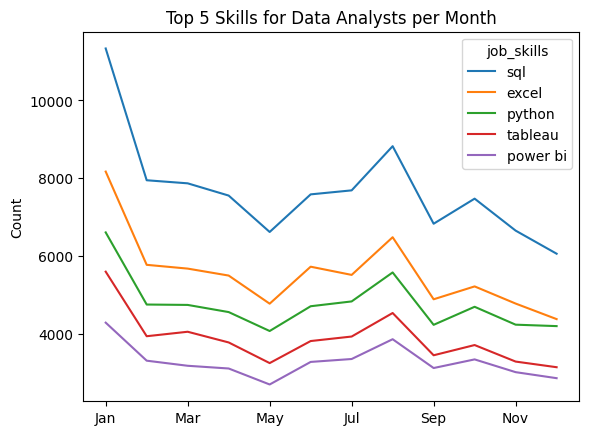

In [2]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
# create a new column for month number
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

# Explode the job_skills column and pivot
df_DA_exploded = df_DA.explode('job_skills')
df_DA_pivot = df_DA_exploded.pivot_table(index='job_posted_month_no' , columns='job_skills' , aggfunc='size' , fill_value=0)

# sort the skills by count
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

# Use month names for plotting
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x : pd.to_datetime(x , format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

# Get the top 5 skills
df_DA_pivot.iloc[:, :5].plot(kind='line')

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

#### 🎨 Basic Customizations

#### 🌈 Line Styles and Colors

**〰️ Line Style**
- **linestyle**: Change the line style

**🎨 Line Color**
- **color**: Change the line color
- **colormap**: Change the color sheme for all data points

**📏 Line Width**
- **linewidth**: Change the line width

**📍 Markers**

**🟢 Marker Style**
- **marker**: Change the marker style

**🔍 Marker Size**
- **markersize**: Change the marker size

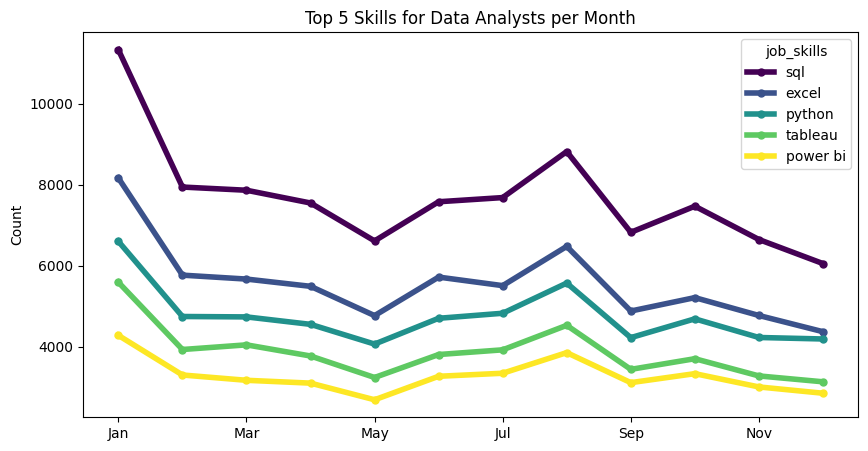

In [4]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle='-',        # options: '-', '--', '-.', ':'
    colormap='viridis',   # options: 'viridis', 'plasma', 'inferno', 'magma', 'cividis' 
    markersize=5,
    marker='o',           # options: 'o', 'x', '+', '*', 's', ',', '.', '1', '2', '3', '4', ...
    figsize=(10, 5)
)

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

#### 📏 Set Axis Limits

**➡️ Set X Limit**

- `xlim`: Set the x-axis view limits

**⬆️ Set Y Limit**

- `ylim`: Set the y-axis view limits

**#️⃣ Grid**

##### ➕ Add Grid

- `grid`: Add a grid to the plot

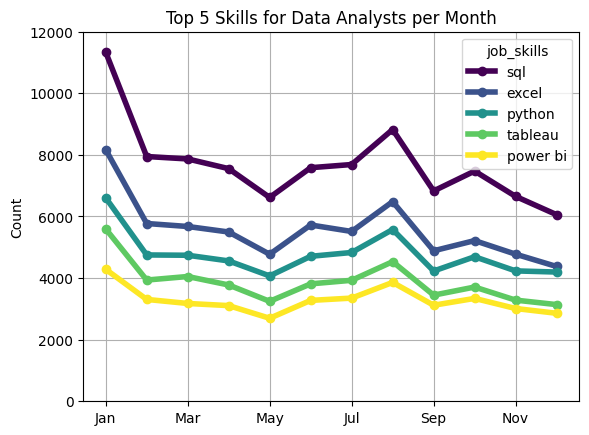

In [5]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle='-', # options: '-', '--', '-.', ':'
    colormap='viridis', # options: 'viridis', 'plasma', 'inferno', 'magma', 'cividis' 
    markersize=6,
    marker='o', # options: 'o', 'x', '+', '*', 's', ',', '.', '1', '2', '3', '4', ...
    # figsize=(10, 5)
)

plt.grid(True)

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylim(0, 12000)
plt.ylabel('Count')
plt.xlabel('')
plt.show()


#### ✏️ Customizing our Scatter Plot from 15_Scatter_Plot.ipynb
Let's now customize the scatter plot from the last exercise.

In [8]:
# Explode the 'job_skills' into individual rows
df_exploded = df_DA.explode('job_skills')

# Calculate the average salary and count of job postings per skill
skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary = ('salary_year_avg' , 'median'),
    skill_count = ('job_skills' , 'count')
)

# Limit to the top skills
skill_count = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)

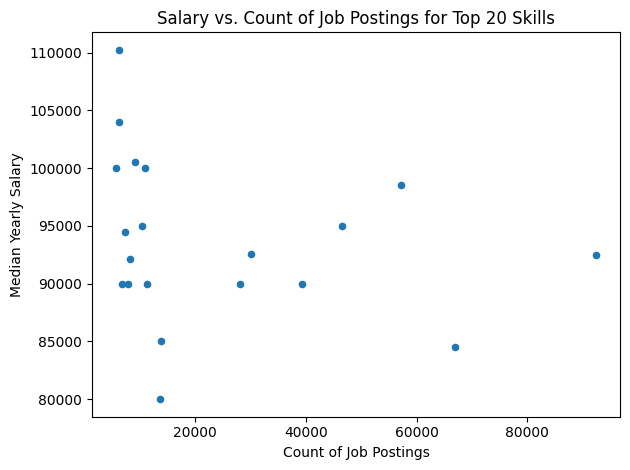

In [9]:
skill_stats.plot(kind='scatter' , x='skill_count' , y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()

#### 📌 Add Annotations

**📝 Text**

- **text()**: Add text annotations to the plot

#### 🔧 Common Arguments

- **x**: The x-coordinate for the text
- **y**: The y-coordinate for the text
- **s**: The text to display
- **fontsize**: The font size of the text
- **color**: The color of the text
- **ha**: Horizontal alignment of the text
- **va**: Vertical alignment of the text

## 💡 Example

Now, looking at our plot above, it's not very useful because it doesn't actually label the top skills. Let's change that and add some annotation in. We'll use a for loop to go through the `top_skills.index` and add in the skill name for each.

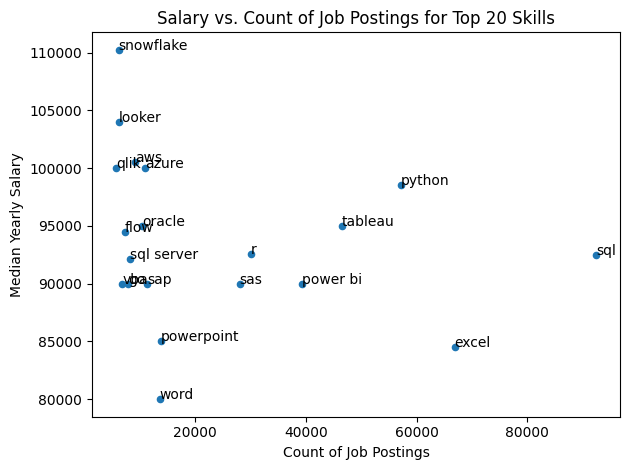

In [10]:
skill_stats.plot(kind='scatter' , x='skill_count' , y='median_salary')

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i] , skill_stats['median_salary'].iloc[i] ,txt)

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()

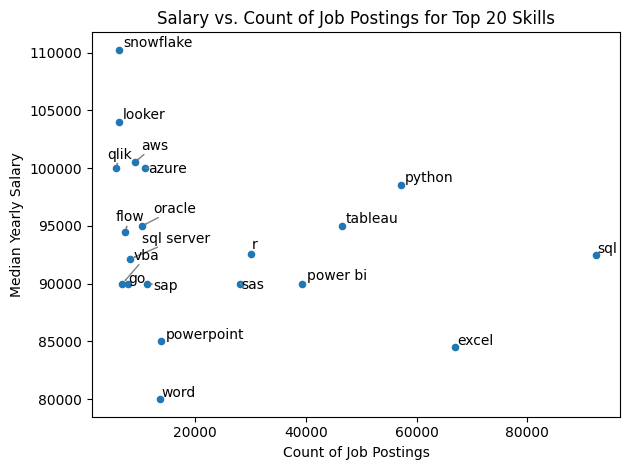

In [11]:
from adjustText import adjust_text

skill_stats.plot(kind='scatter' , x='skill_count' , y='median_salary')

# Prepare texts for adjustText
texts = []

for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i] , skill_stats['median_salary'].iloc[i] , txt))
# Adjust text to avoid overlap
adjust_text(texts , arrowprops=dict(arrowstyle='->' , color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')

# Adjust layout and display plot 
plt.tight_layout()
plt.show()

#### 📊 Set Major Formatter

## 📝 Notes

- **set_major_formatter()**: Set the formatter for the major ticker of the default or specified axis.
- Common arguments:
    - **formatter**: The formatter object used for major ticks. Can be from matplotlib.ticker.

## 💡 Example

For our example let's use set_major_formatter to re-format the y-axis. So the 1000s show up as $1k for instance.

How does this work?

1. **ax.yaxis.set_major_formatter()**: Assigns a custom formatter to the major tick labels on the y-axis.
2. **plt.FuncFormatter()**: Initializes a formatter that uses a user-defined function to format tick labels.
3. **lambda y, _:** An anonymous function that takes two parameters: y (the tick value) and _ (a placeholder for the position, not used here).
4. **f'${int(y/1000)}K'**: Formats the tick value y into thousands, appending 'K' and a dollar sign to indicate currency, enhancing readability for large numbers.

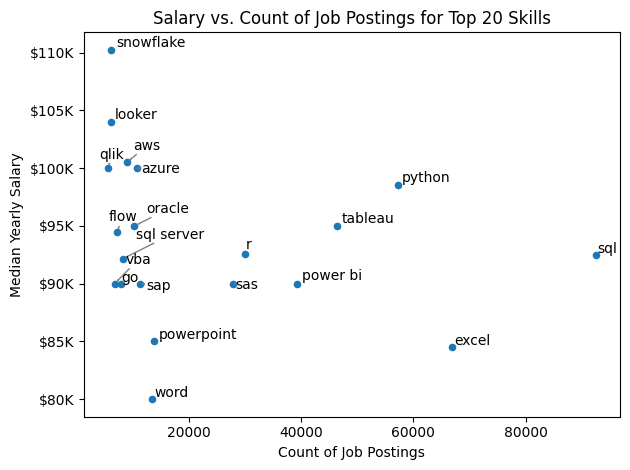

In [12]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### 📊 Matplotlib Advanced Customization ⚙️

## 🔑 Legend

### 📝 Notes

- **legend()**: Place a legend on the axes.

#### 🔧 Common Arguments

- **loc**: Specifies the legend's location on the plot. Values can be a string (e.g., `'upper right'`, `'lower left'`) or a tuple of coordinates.
- **bbox_to_anchor**: A tuple (x, y) to place the legend at a specific position, relative to the axes. Used in conjunction with loc.
- **ncol**: Number of columns in the legend (for when you have many items). Default is `1`.
- **fontsize**: The font size of the legend's text. Accepts numerical values or predefined strings like `'small'`, `'medium'`, `'large'`.
- **title**: The title of the legend. A string value.
- **title_fontsize**: Font size for the legend’s title. Accepts numerical values or predefined strings.
- **frameon**: Boolean. If `True`, a frame is drawn around the legend. Default is `True`.

## 💡 Example

Now, our chart we've been using doesn't actually require a legend since it only features a single dataset. So we'll just add a legend to the three pie charts we made in the last section.

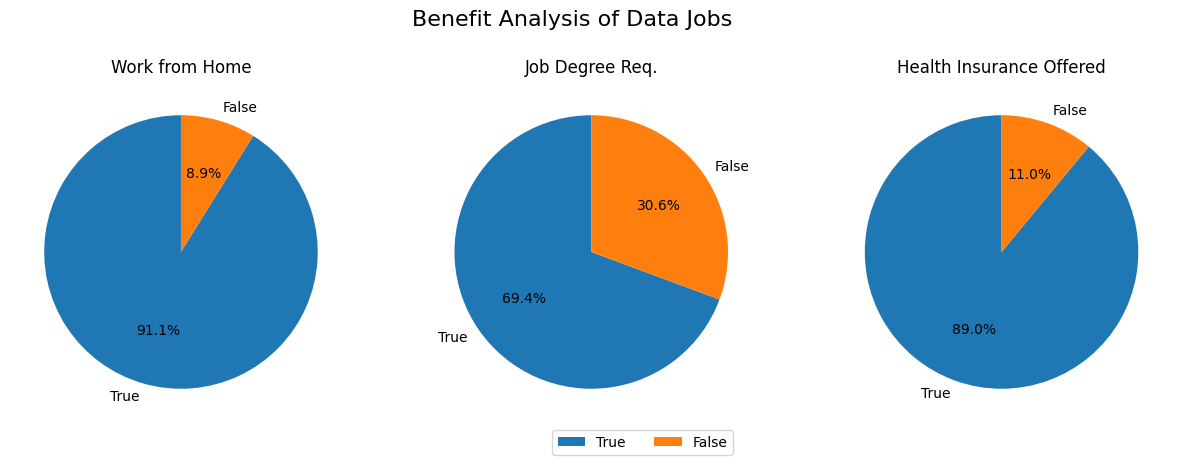

In [13]:
dict_columns = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

fig , ax = plt.subplots(1, 3, figsize=(15, 5))

for i, (column, title) in enumerate(dict_columns.items()):
    ax[i].pie(df[column].value_counts() , labels=['True', 'False'] , autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.suptitle('Benefit Analysis of Data Jobs', fontsize=16)
plt.legend(loc='upper center' , bbox_to_anchor=(-.55, 0) , ncol=2)
plt.show()

#### 📊 Get Current Axes

**🔄 Get Both Axes**

- **gca()**: Get the current axes.
- Returns the current axes matplotlib.axes.Axes instance of the current figure.

**↔️ Get X Axis**

- **get_xaxis()**: Get the x-axis instance.
- Returns the matplotlib.axis.XAxis object for the current axes, enabling further customization of the x-axis.

**↕️ Get Y Axis**

- **get_yaxis()**: Get the y-axis instance.
- Returns the matplotlib.axis.YAxis object for the current axes, allowing further customization of the y-axis.

**💡 Example**

Now before we adjust the axes either by setting limits or formatting it, we'll need to use `gca()` to get the current axes object. Since we want to adjust both axes we'll use `gca()`. But if we wanted to only edit the y-axis for example, we'd use `get_yaxis()`. This lets us use various axes methods to customize our plot.

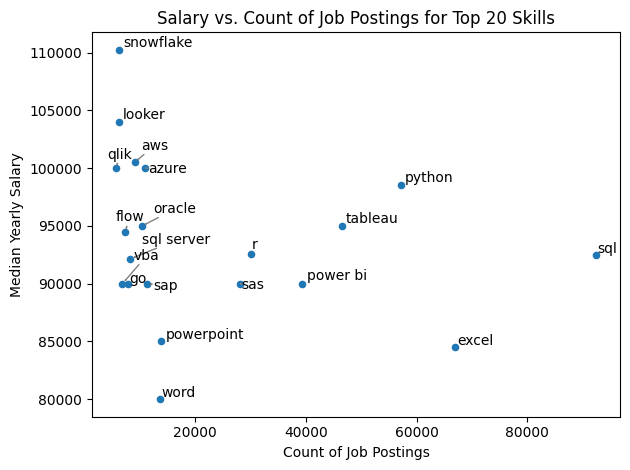

In [14]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))
     
# Set axis labels, title, and legend
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')

# Get current axes
ax = plt.gca()

# Adjust layout and display plot 
plt.tight_layout()
plt.show()